In [101]:
import requests
import tarfile
from tqdm import tqdm
from pathlib import Path
import pickle
from PIL import Image
import numpy as np

In [32]:
DATASET_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'

LOCAL_ARCHIVE = 'archive.tar.gz'
DATA_DIR = Path('data')
BATCHES_DIR = DATA_DIR/'cifar-10-batches-py'

In [24]:
# Download dataset
response = requests.get(DATASET_URL, stream=True)

length = int(response.headers['Content-length'])

chunk_size = 512*1024


with open(LOCAL_ARCHIVE, 'wb') as f:
    response
    for chunk in tqdm(response.iter_content(chunk_size=chunk_size), total=length/chunk_size):
        f.write(chunk)


326it [00:36,  8.83it/s]                                        


In [33]:
# Unpack dataset
with tarfile.open(LOCAL_ARCHIVE) as t:
    t.extractall(DATA_DIR)

In [122]:
batch_file = BATCHES_DIR/'data_batch_1'

with batch_file.open('rb') as f:
    dataset = pickle.load(f, encoding='bytes')

In [123]:
images = dataset[b'data']
images = images.reshape(10000, 32, 32, 3, order='F')

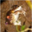

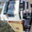

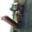

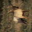

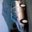

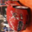

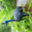

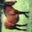

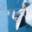

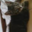

In [124]:
for im in images[:10]:
    display(Image.fromarray(im, 'RGB'))

In [125]:
# Calculate mean values

mean_color = images.mean(axis=(1,2), dtype='int')
mean_color

array([[141, 105,  64],
       [130, 130, 130],
       [133, 135, 132],
       ...,
       [109, 106,  86],
       [110, 128, 126],
       [137, 139,  94]])

array([[[141, 105,  64]]])

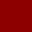

array([[[130, 130, 130]]])

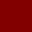

array([[[133, 135, 132]]])

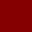

array([[[99, 83, 57]]])

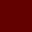

array([[[ 92, 102, 116]]])

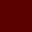

array([[[142,  70,  57]]])

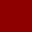

array([[[120, 152,  85]]])

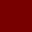

array([[[132, 134,  97]]])

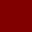

array([[[109, 156, 188]]])

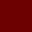

array([[[78, 71, 61]]])

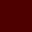

In [126]:
for m in mean_color[:10]:
    swatch = m.reshape((1,1,3))
    display(swatch)
    display(Image.fromarray(swatch, 'RGB').resize((32, 32)))

SyntaxError: invalid syntax (<ipython-input-107-c153bab87f08>, line 1)